## Wine Quality dataset

Importing Libraries

In [39]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import matplotlib.pyplot as plt
import plotly.io as pio
from plotly.subplots import make_subplots
import seaborn as sns
import numpy as np

In [40]:
# load the Wine Quality dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
df2 = df # Creating a new data frame for preprocessing
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [43]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [44]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Data Cleaning

In [45]:
#Checking the data types
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [46]:
#Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [47]:
#df.set_index('quality', inplace=True)

In [48]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Exploratry Data Analysis

In [49]:
column_variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [50]:
# Get the count of each quality category
quality_counts = df['quality'].value_counts()

# Extract the quality categories and their respective counts
quality_categories = quality_counts.index.tolist()
count = quality_counts.tolist()

# Create the bar chart
fig = go.Figure(data=go.Bar(
    x=quality_categories,
    y=count,
    marker=dict(color=quality_categories)  # Set the marker color sequence
))

# Set the layout with no specific theme
fig.update_layout(
    title='Quality of Wine',
    xaxis=dict(title='Quality'),
    yaxis=dict(title='Count'),
    template='plotly_white'  # Set the template to 'plotly_white'
)

# Display the chart
fig.show()


In [51]:
#Cheking Skewness of all attributes
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [52]:
# Create a list to store the histogram traces
histogram_traces = []

# Iterate over the column variables
for column in column_variables:
    # Calculate the skewness for the column
    skewness = df[column].skew()

    # Create a histogram trace for the current column with 70 bins
    histogram_trace = go.Histogram(x=df[column], name=column + " (Skewness: {:.2f})".format(skewness), nbinsx=70)

    # Add the histogram trace to the list
    histogram_traces.append(histogram_trace)

# Create subplots
fig = sp.make_subplots(rows=3, cols=4, subplot_titles=column_variables)

# Iterate over the histogram traces and add them to the subplots
for i, histogram_trace in enumerate(histogram_traces):
    row = (i // 4) + 1
    col = (i % 4) + 1
    fig.add_trace(histogram_trace, row=row, col=col)

    # Update the x-axis label for each subplot
    fig.update_xaxes(title_text='Attribute Value', row=row, col=col)

    # Update the y-axis label for each subplot
    fig.update_yaxes(title_text='Frequency', row=row, col=col)

# Update the overall figure title
fig.update_layout(title_text='Skewness of Attributes', showlegend=False)

# Set the subplot layout to grid
fig.update_layout(height=800, width=1000, autosize=True, template = 'plotly_white')

# Display the figure
fig.show()


In [53]:
# Compute the correlation matrix
corr_matrix = df.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


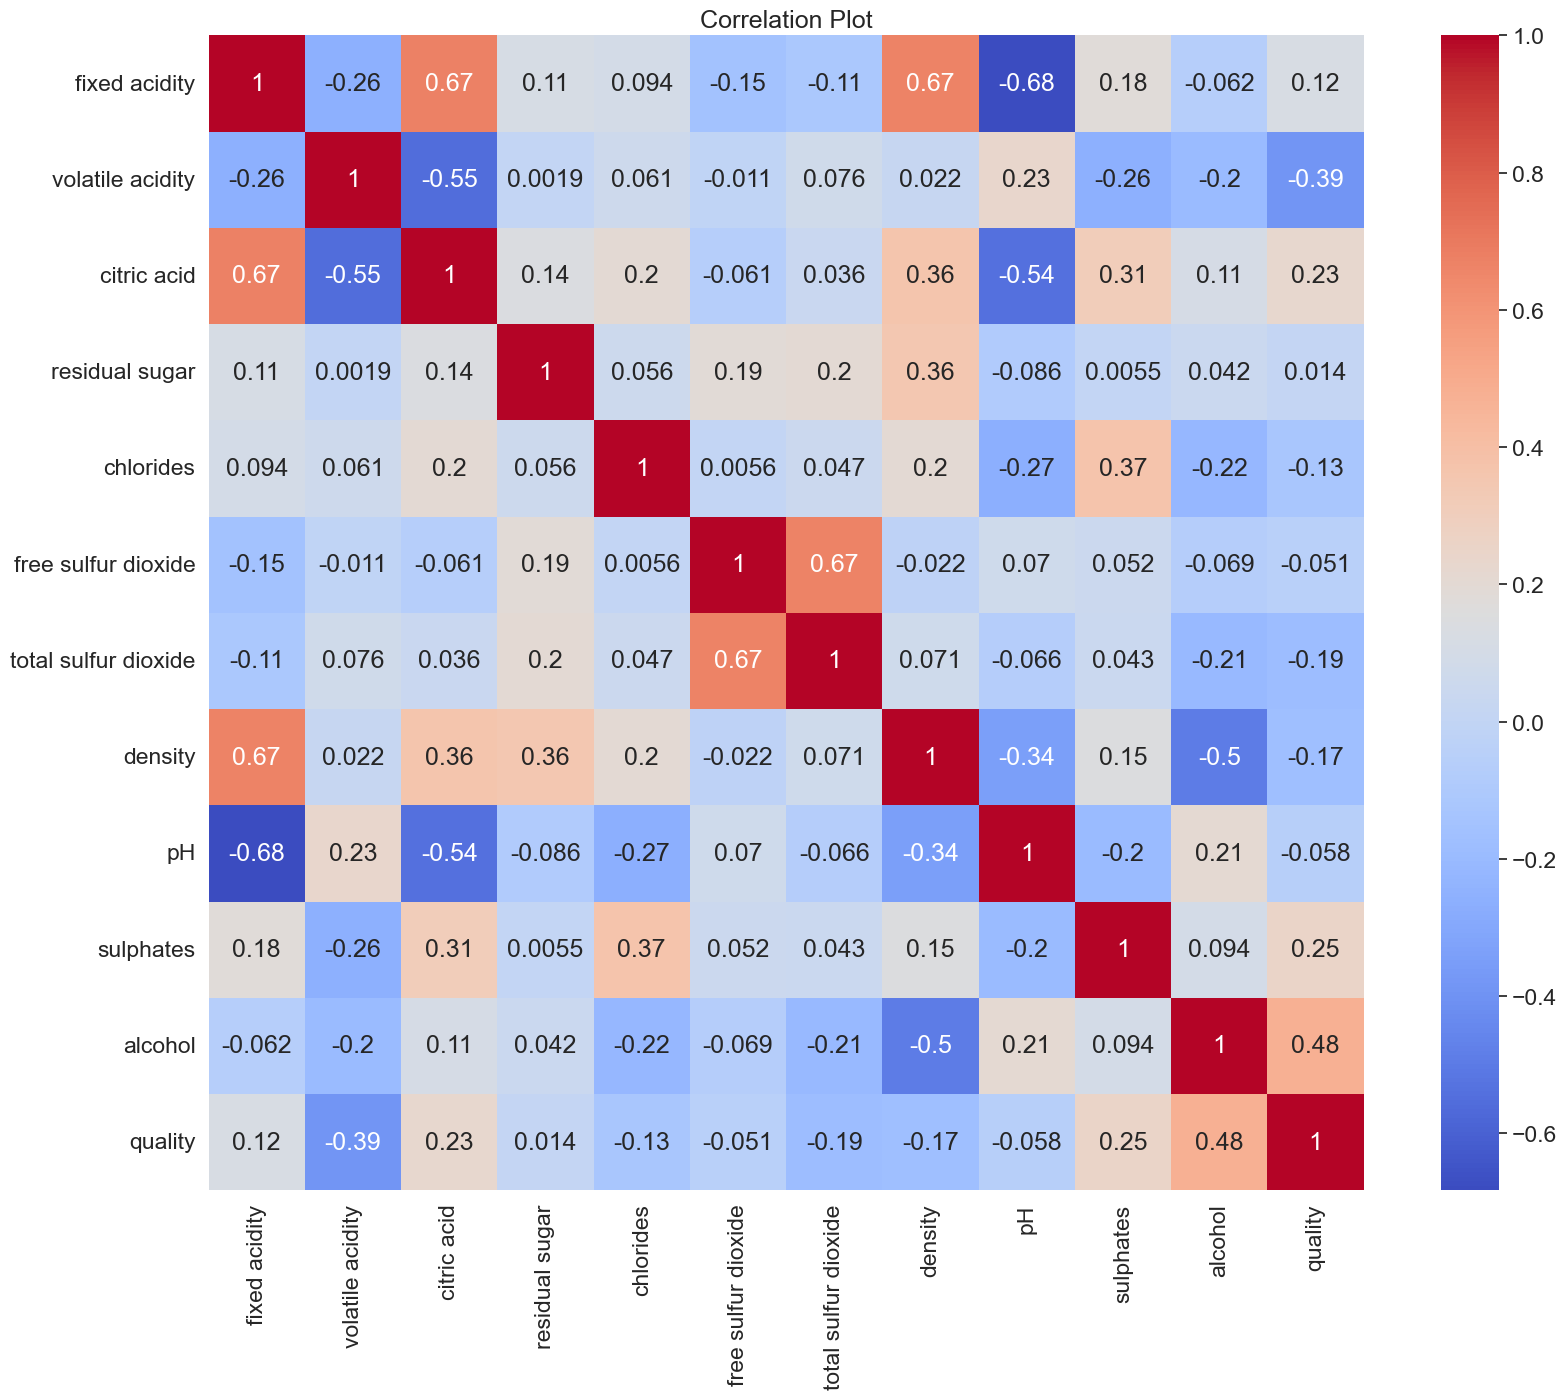

In [54]:
# Create the correlation plot
plt.figure(figsize=(20, 15))  # Adjust the figsize as per your preference
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Set the plot title
plt.title('Correlation Plot')

# Display the plot
plt.show()


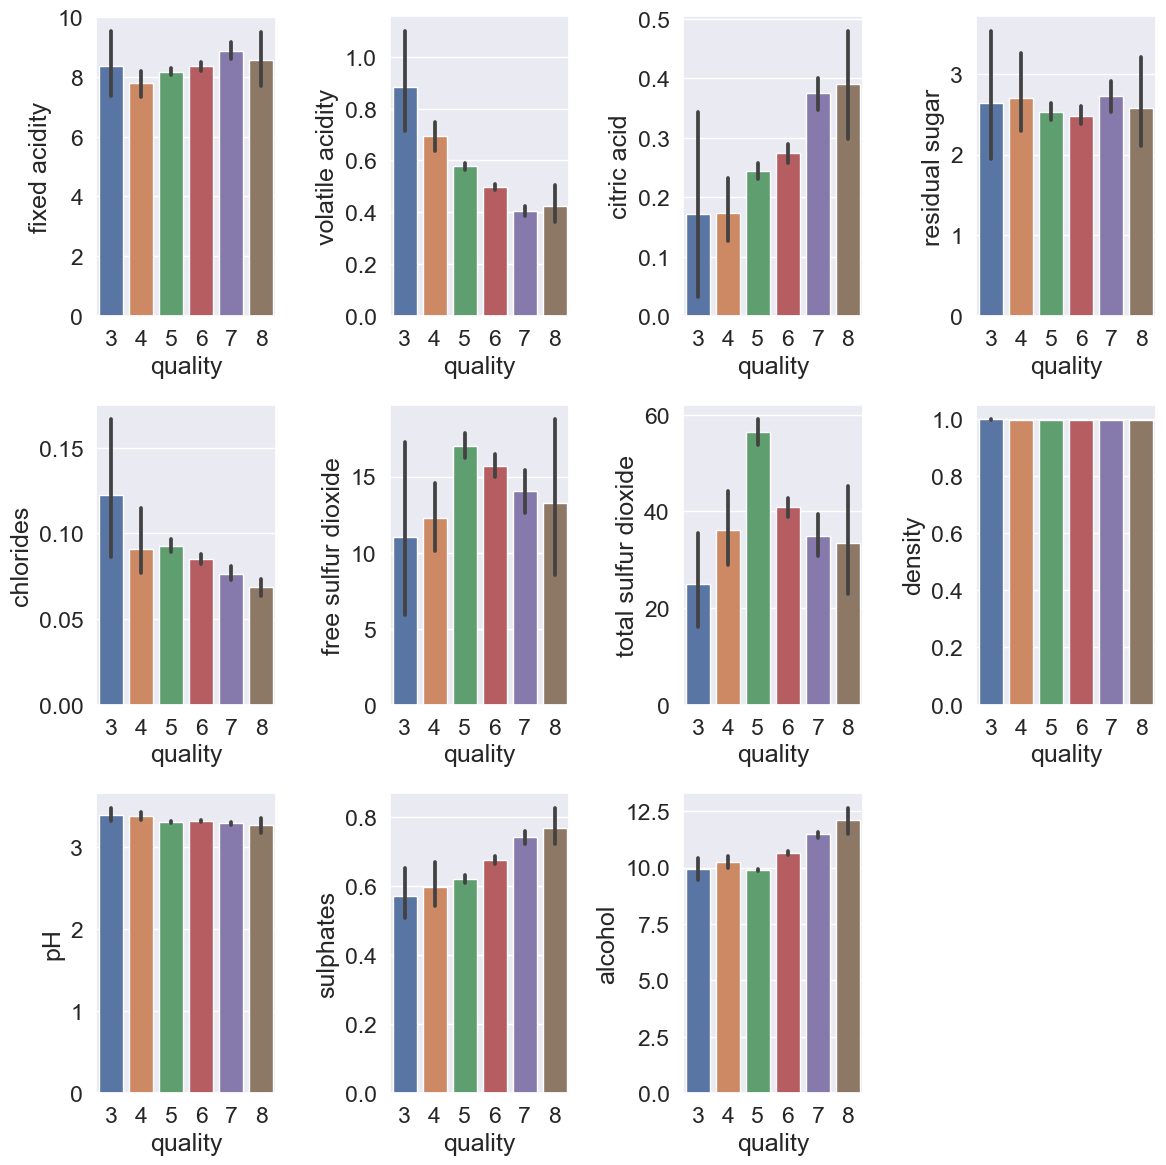

In [55]:

# Define the column variables
column_variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Calculate the number of rows and columns for subplots
num_rows = (len(column_variables) - 1) // 4 + 1
num_cols = min(len(column_variables), 4)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Iterate over the column variables
for i, col in enumerate(column_variables):
    # Create a bar plot for each column variable
    sns.barplot(x='quality', y=col, data=df, ax=axes[i])
    axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(len(column_variables), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [56]:
#Breaking the quality into three categories

bins = [0,4,7,10]
labels = ['Low', 'Medium', 'High']

#Assign new Data frame
df_quality_labeled = df 

#New Column for quality grade
df_quality_labeled['quality grade'] = pd.cut(df_quality_labeled['quality'], bins=bins, labels=labels, right=False)
df_quality_labeled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium


In [57]:
# Group the data by 'quality grade' and count the occurrences
quality_counts = df_quality_labeled['quality grade'].value_counts().sort_index()

# Create the donut chart
fig = go.Figure(data=[go.Pie(labels=quality_counts.index,
                             values=quality_counts.values,
                             hole=0.5)])

# Set the title and template
fig.update_layout(title_text='Distribution of Wine Quality Grades', template = 'plotly_white')

# Show the plot
fig.show()

In [58]:

# Define the quality mapping dictionary
quality_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Apply the quality mapping to create a new column 'quality_mapped'
df_quality_labeled['quality_mapped'] = df_quality_labeled['quality grade'].map(quality_mapping)

# Specify the column variables
column_variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Calculate the number of rows and columns for the subplot grid
num_rows = len(column_variables) // 2 + len(column_variables) % 2
num_cols = 2

# Create subplots
fig = sp.make_subplots(rows=num_rows, cols=num_cols, subplot_titles=column_variables)

# Initialize subplot position
row_pos = 1
col_pos = 1

# Iterate over the column variables and create density heatmaps
for column in column_variables:
    # Create the density heatmap for each column
    heatmap = go.Histogram2d(
        x=df_quality_labeled['quality_mapped'],
        y=df_quality_labeled[column],
        colorscale='Viridis',
        nbinsx=3,
        nbinsy=20,
        hovertemplate='Column: %{y}<extra></extra>'  # Exclude the "Quality Grade" from the hovertemplate
    )
    fig.add_trace(heatmap, row=row_pos, col=col_pos)

    # Update x-axis tick labels
    fig.update_xaxes(tickvals=[1, 2, 3], ticktext=['Low', 'Medium', 'High'], row=row_pos, col=col_pos)
    fig.update_yaxes(title_text=column, row=row_pos, col=col_pos)
    fig.update_layout(showlegend=False)

    # Update subplot position
    col_pos += 1
    if col_pos > num_cols:
        col_pos = 1
        row_pos += 1

# Update layout and show the plot
fig.update_layout(height=1500, width=800, title_text="Density Heatmaps", template = 'plotly_white')
fig.show()


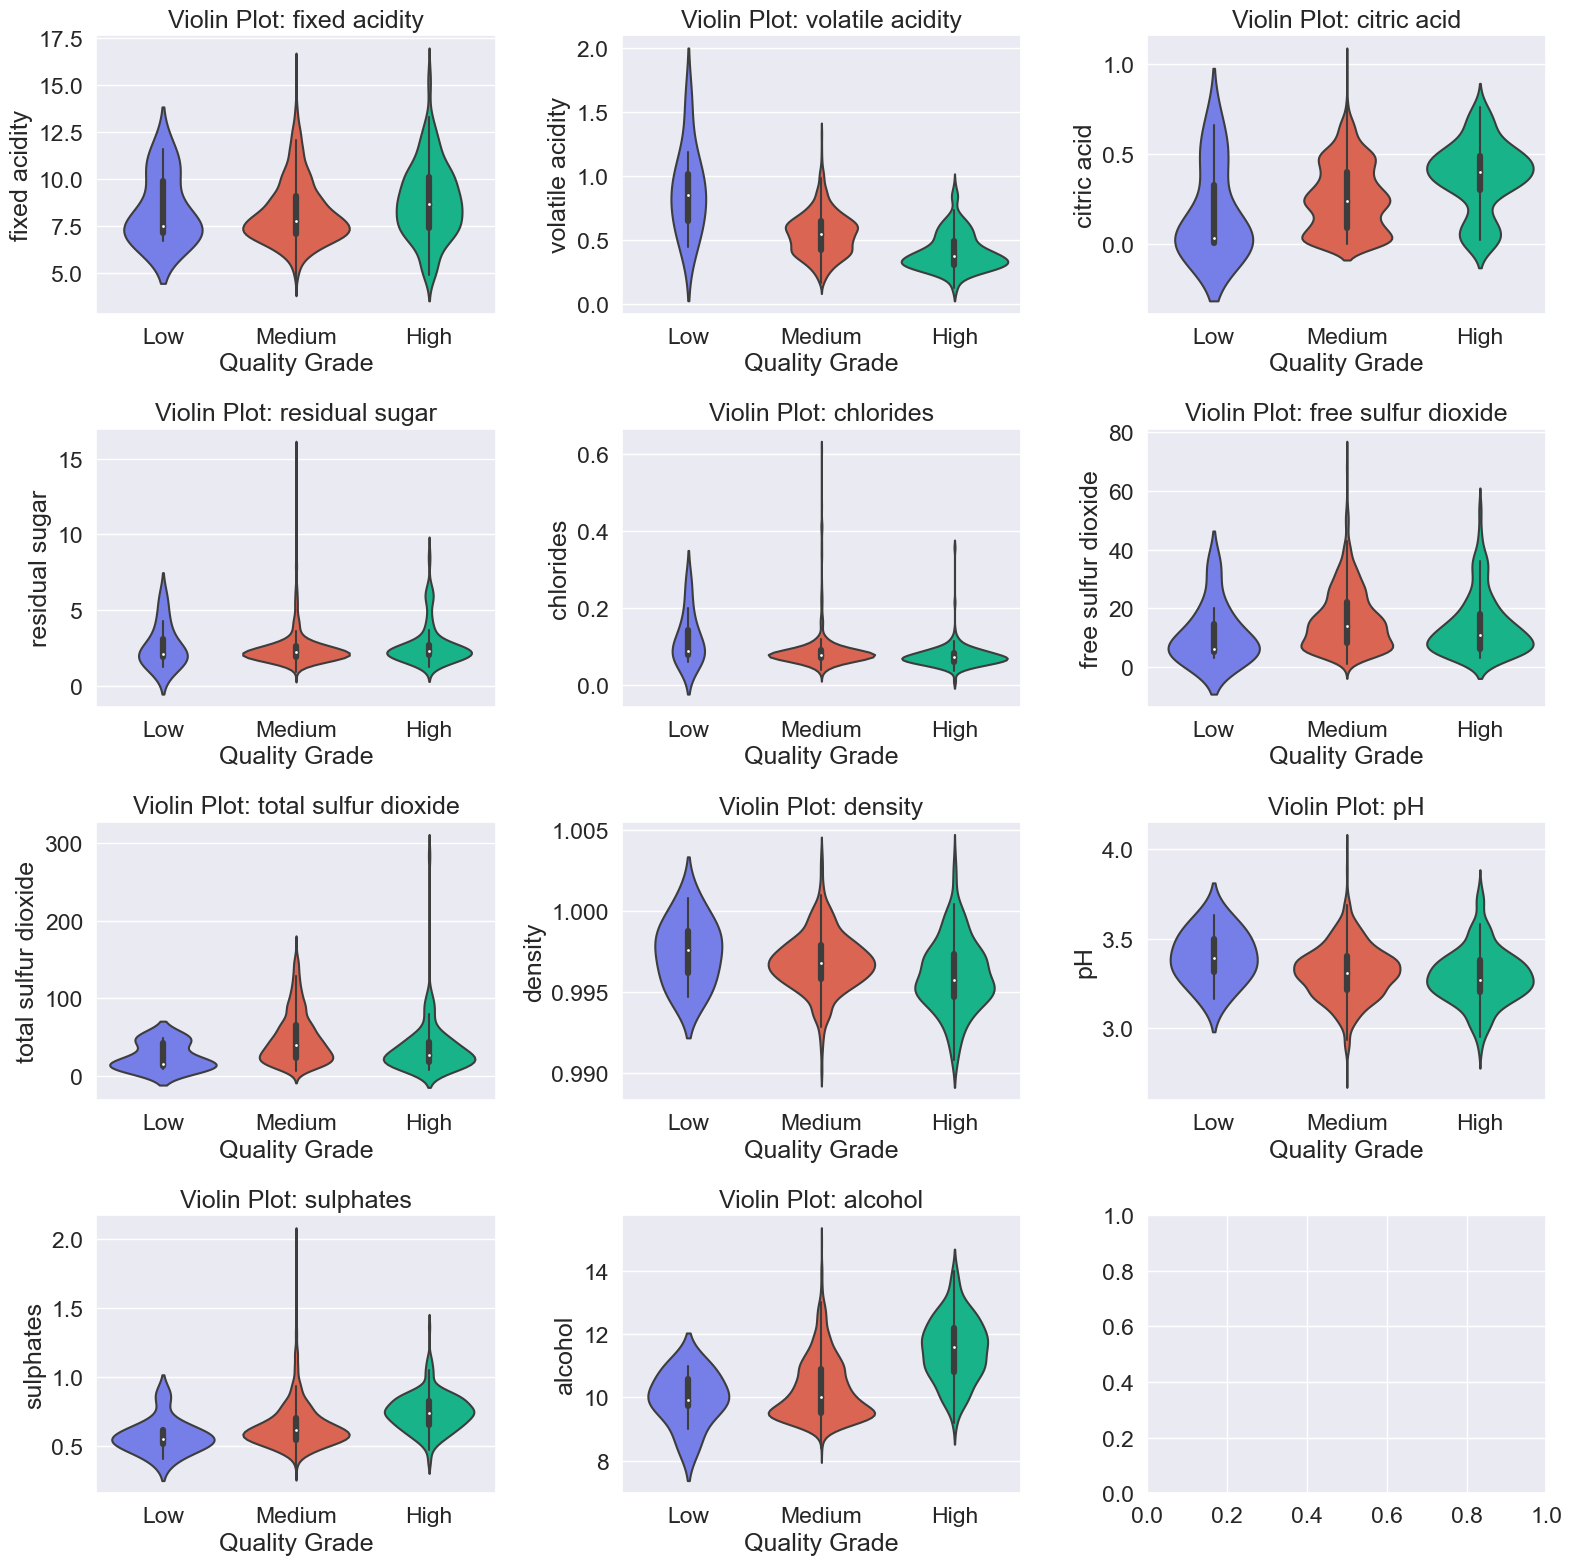

In [59]:

# Apply the quality mapping to create a new column 'quality_mapped'
df_quality_labeled['quality_mapped'] = df_quality_labeled['quality grade'].map(quality_mapping)

# Specify the column variables
column_variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                    'density', 'pH', 'sulphates', 'alcohol', ]

# Set the Plotly theme for Seaborn
sns.set_theme(style="darkgrid")
sns.set_context("notebook", font_scale=1.5)

# Define the colors for the violin plots
colors = ['#636EFA', '#EF553B', '#00CC96']

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(16, 16))

# Initialize subplot position
row_pos = 0
col_pos = 0

# Iterate over the column variables and create violin plots
for i, column in enumerate(column_variables):
    # Create the violin plot for each column
    ax = sns.violinplot(data=df_quality_labeled, x='quality_mapped', y=column, ax=axes[row_pos, col_pos], palette=colors)

    # Set x-axis labels
    ax.set_xlabel('Quality Grade')
    ax.set_xticklabels(['Low', 'Medium', 'High'])

    # Set subplot title
    ax.set_title(f'Violin Plot: {column}')

    # Update subplot position
    col_pos += 1
    if col_pos > 2:
        col_pos = 0
        row_pos += 1

# Adjust the layout
plt.tight_layout()

# Set the Plotly theme for the plot
pio.templates.default = "plotly_white"

# Show the plot
plt.show()


In [60]:
# Create the scatter plot
fig = px.scatter(df_quality_labeled, 
                 x='citric acid', 
                 y='fixed acidity', 
                 color='quality grade', 
                 size='quality',
                 title='Scatter Plot: Quality Mapping vs Fixed Acidity',
                 template='plotly_white')

# Show the plot
fig.show()


In [61]:
# Create the scatter plot
fig = px.scatter(df_quality_labeled, 
                 x='density', 
                 y='fixed acidity', 
                 color='quality grade', 
                 size='quality',
                 title='Scatter Plot: Quality Mapping vs Fixed Acidity',
                 template='plotly_white')

# Show the plot
fig.show()


In [62]:
# Create the scatter plot
fig = px.scatter(df_quality_labeled, 
                 x='pH', 
                 y='fixed acidity', 
                 color='quality grade', 
                 size='quality',
                 title='Scatter Plot: Quality Mapping vs Fixed Acidity',
                 template='plotly_white')

# Show the plot
fig.show()


In [63]:
# Create the scatter plot
fig = px.scatter(df_quality_labeled, 
                 x='volatile acidity', 
                 y='citric acid', 
                 color='quality grade', 
                 size='quality',
                 title='Scatter Plot: Quality Mapping vs Fixed Acidity',
                 template='plotly_white')

# Show the plot
fig.show()


In [64]:
# Create the scatter plot
fig = px.scatter(df_quality_labeled, 
                 x='alcohol', 
                 y='quality', 
                 color='quality grade', 
                 size='quality',
                 title='Scatter Plot: Quality Mapping vs Fixed Acidity',
                 template='plotly_white')

# Show the plot
fig.show()


Checking for outliers

In [65]:

# Reshape the DataFrame to long format
df_long = pd.melt(df, value_vars=column_variables, var_name='Feature', value_name='Value')

# Create the box plot
fig = px.box(df_long, x='Feature', y='Value', title='Outliers', color='Feature')

# Apply the 'plotly_dark' theme
fig.update_layout(template='plotly_white')

# Show the plot
fig.show()

In [66]:
import numpy as np

# Select the columns for which you want to remove outliers
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol']

# Calculate the quartiles and IQR for each column
Q1_values = df[columns].quantile(0.25)
Q3_values = df[columns].quantile(0.75)
IQR_values = Q3_values - Q1_values

# Define the threshold values for outliers
lower_thresholds = (Q1_values - 1.5 * IQR_values).to_dict()
upper_thresholds = (Q3_values + 1.5 * IQR_values).to_dict()

# Filter out the outliers based on the threshold
outliers_removed = df.copy()
for column in columns:
    lower_threshold = lower_thresholds[column]
    upper_threshold = upper_thresholds[column]
    outliers_removed = outliers_removed.loc[
        (outliers_removed[column] >= lower_threshold) &
        (outliers_removed[column] <= upper_threshold)
    ]

# Print the number of outliers removed
num_outliers_removed = len(df) - len(outliers_removed)
print(f"Number of outliers removed: {num_outliers_removed}")

# Use the 'outliers_removed' DataFrame for further analysis or modeling
print("Original Size: ", df.shape)
print("Outlier Removes :", outliers_removed.shape)

Number of outliers removed: 405
Original Size:  (1599, 14)
Outlier Removes : (1194, 14)


In [67]:

# Reshape the DataFrame to long format
df_long = pd.melt(outliers_removed, value_vars=column_variables, var_name='Feature', value_name='Value')

# Create the box plot
fig = px.box(df_long, x='Feature', y='Value', title='Outliers', color='Feature')

# Apply the 'plotly_dark' theme
fig.update_layout(template='plotly_white')

# Show the plot
fig.show()

Scaleing the data

In [68]:
from sklearn.preprocessing import StandardScaler

# Select the columns to be scaled
columns_to_scale = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                    'pH', 'sulphates', 'alcohol']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the selected columns and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print the scaled DataFrame
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality grade,quality_mapped
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,Medium,2
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5,Medium,2
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5,Medium,2
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6,Medium,2
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,Medium,2


Split Training and test dataset

In [69]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = outliers_removed.drop('quality', axis=1)  # Features
y = outliers_removed['quality']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ValueError: could not convert string to float: 'High'